# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `basic_agent_sample_task_data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
import sys
import pandas as pd
from sample_task import Sample_Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                      # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])   # initial pose
init_velocities = np.array([0., 0., 0.])          # initial velocities
init_angle_velocities = np.array([0., 0., 0.])    # initial angle velocities
file_output = 'basic_agent_sample_task_data.txt'  # file name for saved results

# Setup
task = Sample_Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

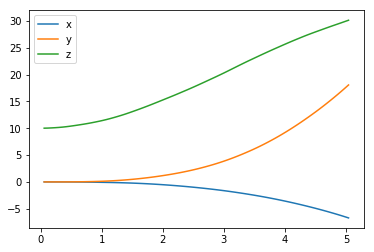

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

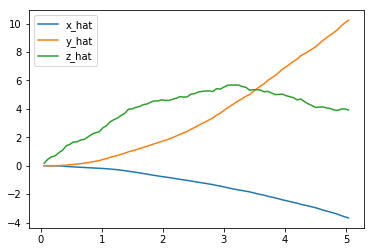

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

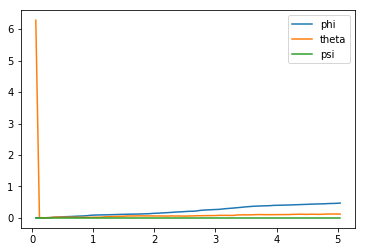

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

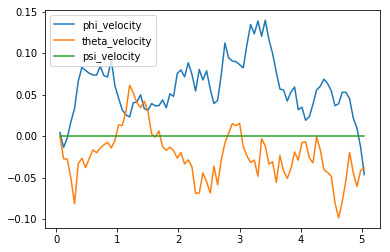

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

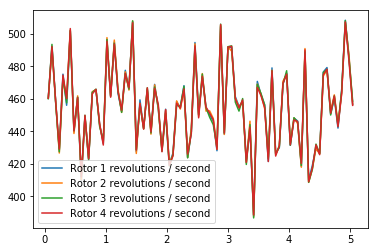

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -6.70524163  18.05546775  30.10734779   0.47185913   0.12157708   0.        ]
[ -3.67308833  10.23766721   3.92001495]
[-0.04637371 -0.03859305  0.        ]


In the sample task in `sample_task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Sample Task

A sample task has been provided for you in `sample_task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Sample Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
from agents.policy_search import PolicySearch_Agent

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Sample_Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            sys.stdout.flush()
            break

Episode =   40, score =  -4.478 (best =  -0.336), noise_scale = 3.255

KeyboardInterrupt: 

This agent should perform very poorly on this sample task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## DDPG Agent

I created a DDPG (Deep Deterministic Policy Gradient) agent inspired by the algorithm outlined by Lillicrap, Timothy P., et al., in their 2015 paper Continuous Control with Deep Reinforcement Learning https://arxiv.org/pdf/1509.02971.pdf.

I made use sample code included in the Quadcopter Project starter code for the ReplayBuffer, Actor, Critic, OUNoise (Ornstein-Uhlenbeck noise process) classes that are part of my agent's model. These classes are stored in the file `model.py`.

My agent's class itself if titled `DDPG_Agent`, and this is stored in the file `agents/agent.py`.

## OpenAI Gym `MountainCarContinuous-v0 ` cart task

<a href="MountainCarContinuous-v0"><img src="images/MountainCarContinuous-v0.png" align="left" width="400"></a>

I first validated my DDPG implementation on OpenAI Gym's `MountainCarContinuous-v0` task.

Task description (from https://github.com/openai/gym/wiki/MountainCarContinuous-v0): 

"An underpowered car must climb a one-dimensional hill to reach a target. Unlike MountainCar v0, the action (engine force applied) is allowed to be a continuous value.

The target is on top of a hill on the right-hand side of the car. If the car reaches it or goes beyond, the episode terminates.

On the left-hand side, there is another hill. Climbing this hill can be used to gain potential energy and accelerate towards the target. On top of this second hill, the car cannot go further than a position equal to -1, as if there was a wall. Hitting this limit does not generate a penalty (it might in a more challenging version)."

OpenAI Gym considers this task solved when the agent earns an average reward of 90.0 over 100 consecutive trials.

In [1]:
### IMPORTS
%load_ext autoreload
%autoreload 2
import csv
import sys
import pandas as pd
from sample_task import Sample_Task
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
### MODEL.PY
import random
import numpy as np
import copy
from collections import namedtuple, deque
from keras import layers, models, optimizers
from keras import backend as K


class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, buffer_size, batch_size):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size: maximum size of buffer
            batch_size: size of each training batch
        """
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        
    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    #def sample(self, batch_size=64):
    def sample(self, batch_size=256):
        """Randomly sample a batch of experiences from memory."""
        return random.sample(self.memory, k=self.batch_size)
    
    
class OUNoise:
    """
    Ornstein-Uhlenbeck process. Generates random samples from a Gaussian 
    (Normal) distribution, but each sample affects the next one such that 
    two consecutive samples are more likely to be closer together than 
    further apart.
    
    The OU process tends to settle down close to the specified mean over time. 
    When used to generate noise, we can specify a mean of zero, and that will 
    have the effect of reducing exploration as we make progress on 
    learning the task.
    """

    def __init__(self, size, mu, theta, sigma):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.randn(len(x))
        self.state = x + dx
        return self.state
    

class Actor:
    """
    Actor (Policy) Model, using Deep Deterministic Policy Gradients 
    or DDPG. An actor-critic method, but with the key idea that the 
    underlying policy function used is deterministic in nature, with 
    some noise added in externally to produce the desired stochasticity 
    in actions taken.

    Algorithm originally presented in this paper:

    Lillicrap, Timothy P., et al., 2015. Continuous Control with Deep 
    Reinforcement Learning

    https://arxiv.org/pdf/1509.02971.pdf

    """

    def __init__(self, state_size, action_size, action_low, action_high):
        """Initialize parameters and build model.

        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            action_low (array): Min value of each action dimension
            action_high (array): Max value of each action dimension
        """
        self.state_size = state_size
        self.action_size = action_size
        self.action_low = action_low
        self.action_high = action_high
        self.action_range = self.action_high - self.action_low

        # Initialize any other variables here

        self.build_model()

    def build_model(self):
        """Build an actor (policy) network that maps states -> actions."""
        # Define input layer (states)
        states = layers.Input(shape=(self.state_size,), name='states')

        # Add hidden layers
        net = layers.Dense(units=32, activation='relu')(states)
        net = layers.Dense(units=64, activation='relu')(net)
        net = layers.Dense(units=32, activation='relu')(net)

        # Try different layer sizes, activations, add batch normalization, regularizers, etc.

        # Add final output layer with sigmoid activation
        raw_actions = layers.Dense(units=self.action_size, activation='sigmoid',
            name='raw_actions')(net)

        # Note that the raw actions produced by the output layer are in a [0.0, 1.0] range 
        # (using a sigmoid activation function). So, we add another layer that scales each 
        # output to the desired range for each action dimension. This produces a deterministic 
        # action for any given state vector.
        actions = layers.Lambda(lambda x: (x * self.action_range) + self.action_low,
            name='actions')(raw_actions)

        # Create Keras model
        self.model = models.Model(inputs=states, outputs=actions)

        # Define loss function using action value (Q value) gradients
        # These gradients will need to be computed using the critic model, and 
        # fed in while training. This is why they are specified as part of the 
        # "inputs" used in the training function.
        action_gradients = layers.Input(shape=(self.action_size,))
        loss = K.mean(-action_gradients * actions)

        # Incorporate any additional losses here (e.g. from regularizers)

        # Define optimizer and training function
        optimizer = optimizers.Adam()
        updates_op = optimizer.get_updates(params=self.model.trainable_weights, loss=loss)
        self.train_fn = K.function(
            inputs=[self.model.input, action_gradients, K.learning_phase()],
            outputs=[],
            updates=updates_op)


class Critic:
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size):
        """Initialize parameters and build model.

        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
        """
        self.state_size = state_size
        self.action_size = action_size

        # Initialize any other variables here

        self.build_model()

    def build_model(self):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        # Define input layers. The critic model needs to map (state, action) pairs to 
        # their Q-values. This is reflected in the following input layers.
        states = layers.Input(shape=(self.state_size,), name='states')
        actions = layers.Input(shape=(self.action_size,), name='actions')

        # Add hidden layer(s) for state pathway
        net_states = layers.Dense(units=32, activation='relu')(states)
        net_states = layers.Dense(units=64, activation='relu')(net_states)

        # Add hidden layer(s) for action pathway
        net_actions = layers.Dense(units=32, activation='relu')(actions)
        net_actions = layers.Dense(units=64, activation='relu')(net_actions)

        # Try different layer sizes, activations, add batch normalization, regularizers, etc.

        # Combine state and action pathways. The two layers can first be processed via separate 
        # "pathways" (mini sub-networks), but eventually need to be combined.
        net = layers.Add()([net_states, net_actions])
        net = layers.Activation('relu')(net)

        # Add more layers to the combined network if needed

        # Add final output layer to produce action values (Q values). The final output 
        # of this model is the Q-value for any given (state, action) pair.
        Q_values = layers.Dense(units=1, name='q_values')(net)

        # Create Keras model
        self.model = models.Model(inputs=[states, actions], outputs=Q_values)

        # Define optimizer and compile model for training with built-in loss function
        optimizer = optimizers.Adam()
        self.model.compile(optimizer=optimizer, loss='mse')

        # Compute action gradients (derivative of Q values w.r.t. to actions). We also need 
        # to compute the gradient of every Q-value with respect to its corresponding action 
        # vector. This is needed for training the actor model. 
        # This step needs to be performed explicitly.
        action_gradients = K.gradients(Q_values, actions)

        # Finally, a separate function needs to be defined to provide access to these gradients. 
        # Define an additional function to fetch action gradients (to be used by actor model).
        self.get_action_gradients = K.function(
            inputs=[*self.model.input, K.learning_phase()],
            outputs=action_gradients)

In [9]:
### AGENT.PY
import numpy as np
import gym
#from model import Actor, Critic, OUNoise, ReplayBuffer

class DDPG_Agent():
    """
    Reinforcement Learning agent that learns by using DDPG, or Deep 
    Deterministic Policy Gradients. An actor-critic method, but with 
    the key idea that the underlying policy function used is deterministic 
    in nature, with some noise added in externally to produce the desired 
    stochasticity in actions taken.

    Algorithm originally presented in this paper:

    Lillicrap, Timothy P., et al., 2015. Continuous Control with Deep 
    Reinforcement Learning

    https://arxiv.org/pdf/1509.02971.pdf
    
    Code in this class, as well as from the Actor, Critic, OUNoise, and 
    ReplayBuffer classes in model.py was adopted from sample code that 
    introduced DDPG in the Reinforcement Learning lesson Udacity's 
    Machine Learning Engineer nanodegree.
    
    Certain modifications to the Udacity approach, such as using an 
    initial exploration policy to warm up a larger memory buffer 
    (batch size of 256 instead of 64) was inspired by another DDPG solution 
    to OpenAI Gym's 'MountainCarContinuous-v0' environment. This 
    implementation can be viewed at: 
    
    https://github.com/lirnli/OpenAI-gym-solutions/blob/master/Continuous_Deep_Deterministic_Policy_Gradient_Net/DDPG%20Class%20ver2.ipynb
    
    Note that we will need two copies of each model - one local and one target. 
    This is an extension of the "Fixed Q Targets" technique from Deep Q-Learning, 
    and is used to decouple the parameters being updated from the ones that are 
    producing target values.
    """
    def __init__(self, task):
        self.task = task
        
        # Flag to keep track of whether the task comes from an OpenAi Gym env
        # reference below in reset() method.
        self.taskIsOpenAiGymEnv = False
        
        # Check to see if task is an OpenAi Gym environment.
        # If the task is a gym env, it will have the 'action_space' 
        # attribute. 
        try:
            # For OpenAI Gym envs, the following attributes need 
            # to be calculated differently from from a standard 
            # Quadcopter task.
            self.action_size = task.action_space.shape[0]
            self.action_low = task.action_space.low[0]
            self.action_high = task.action_space.high[0]
            # If task is OpenAi Gym 'MountainCarContinuous-v0' environment
            # Adjust state size to take advantage of action_repeat parameter.
            # Must do this here when running the 'MountainCarContinuous-v0' environment.
            # For Quadcopter tasks, action_repeat value is defined inside the task's class.
            # (see task.py for reference)
            self.action_repeat = 3
            self.state_size = task.observation_space.shape[0] * self.action_repeat
            self.taskIsOpenAiGymEnv = True   # Set to True since we know we're in an OpenAi Gym env
            
        # If an AttributeError gets thrown, we assume that the DDPG_Agent() object is 
        # being initiated with the type of quadcopter task for which the agent was 
        # originally architected.
        except AttributeError:
            # Task is a Quadcopter task so can calculate the 
            # following attributes in a manner consistent with 
            # overall architecture of the agent/model/quadcopter task.
            self.state_size = task.state_size
            self.action_size = task.action_size
            self.action_low = task.action_low
            self.action_high = task.action_high

        # Actor (Policy) Model
        self.actor_local = Actor(self.state_size, self.action_size, self.action_low, self.action_high)
        self.actor_target = Actor(self.state_size, self.action_size, self.action_low, self.action_high)

        # Critic (Value) Model
        self.critic_local = Critic(self.state_size, self.action_size)
        self.critic_target = Critic(self.state_size, self.action_size)

        # Initialize target model parameters with local model parameters
        self.critic_target.model.set_weights(self.critic_local.model.get_weights())
        self.actor_target.model.set_weights(self.actor_local.model.get_weights())

        # OU Noise process.
        # Specify a mean of zero, and that will have the effect of reducing 
        # exploration as we make progress on learning the task.
        self.exploration_mu = 0
        self.exploration_theta = 0.15
        self.exploration_sigma = 0.2
        self.noise = OUNoise(self.action_size, self.exploration_mu, self.exploration_theta, self.exploration_sigma)

        # Replay memory
        self.buffer_size = 10000
        # self.buffer_size = 100000
        self.batch_size = 256
        # self.batch_size = 64
        self.memory = ReplayBuffer(self.buffer_size, self.batch_size)

        # Algorithm parameters
        self.gamma = 0.99  # discount factor
        # self.tau = 0.01
        self.tau = 0.001  # for soft update of target parameters

    def reset_episode(self):
        self.noise.reset()
        state = self.task.reset()
        
        # If task is OpenAi Gym 'MountainCarContinuous-v0' environment, must 
        # expand the state returned from the gym environment according to 
        # our chosen action_repeat parameter value.
        if self.taskIsOpenAiGymEnv:
            state = np.concatenate([state] * self.action_repeat) 
        
        self.last_state = state
        return state

    def step(self, action, reward, next_state, done):
         # Save experience / reward
        self.memory.add(self.last_state, action, reward, next_state, done)

        # Learn, if enough samples are available in memory
        # if len(self.memory) > self.batch_size:
        if len(self.memory) > self.batch_size*3:
            experiences = self.memory.sample(self.batch_size)
            self.learn(experiences)

        # Roll over last state and action
        self.last_state = next_state

    def act(self, state):
        """Returns action(s) for given state(s) as per current policy."""
        state = np.reshape(state, [-1, self.state_size])
        action = self.actor_local.model.predict(state)[0]
        #return list(action + self.noise.sample())  # add some noise for exploration
        return action

    def learn(self, experiences):
        """Update policy and value parameters using given batch of experience tuples."""
        # Convert experience tuples to separate arrays for each element (states, actions, rewards, etc.)
        states = np.vstack([e.state for e in experiences if e is not None])
        actions = np.array([e.action for e in experiences if e is not None]).astype(np.float32).reshape(-1, self.action_size)
        rewards = np.array([e.reward for e in experiences if e is not None]).astype(np.float32).reshape(-1, 1)
        dones = np.array([e.done for e in experiences if e is not None]).astype(np.uint8).reshape(-1, 1)
        next_states = np.vstack([e.next_state for e in experiences if e is not None])

        # Get predicted next-state actions and Q values from target models
        # Q_targets_next = critic_target(next_state, actor_target(next_state))
        actions_next = self.actor_target.model.predict_on_batch(next_states)
        Q_targets_next = self.critic_target.model.predict_on_batch([next_states, actions_next])

        # Compute Q targets for current states and train critic model (local)
        Q_targets = rewards + self.gamma * Q_targets_next * (1 - dones)
        self.critic_local.model.train_on_batch(x=[states, actions], y=Q_targets)

        # Train actor model (local)
        action_gradients = np.reshape(self.critic_local.get_action_gradients([states, actions, 0]), (-1, self.action_size))
        self.actor_local.train_fn([states, action_gradients, 1])  # custom training function

        # Soft-update target models
        self.soft_update(self.critic_local.model, self.critic_target.model)
        self.soft_update(self.actor_local.model, self.actor_target.model)   

    def soft_update(self, local_model, target_model):
        """Soft update model parameters."""
        local_weights = np.array(local_model.get_weights())
        target_weights = np.array(target_model.get_weights())

        assert len(local_weights) == len(target_weights), "Local and target model parameters must have the same size"

        new_weights = self.tau * local_weights + (1 - self.tau) * target_weights
        target_model.set_weights(new_weights)

In [11]:
import gym
#from agents.agent import DDPG_Agent

env = gym.make('MountainCarContinuous-v0')
agent = DDPG_Agent(env)
action_repeat = 3
num_episodes = 20
rewards_list = []                             # store the total rewards earned for each episode
best_reward = -np.inf                         # keep track of the best reward across episodes


def NewOUNoise():
    theta = 0.15
    sigma = 0.2
    state = 0
    while True:
        yield state
        state += -theta*state+sigma*np.random.randn()

max_explore_eps = 100
episode = 0
episode_steps = 0
noise = NewOUNoise()
state = agent.reset_episode() # start a new episode
# Run the simulation for each episode.
for i_episode in range(1, num_episodes+1):
    #state = agent.reset_episode() # start a new episode
    total_reward = 0
    while True:
        action = agent.act(state)
        if episode < max_explore_eps: # exploration policy
            p = episode/max_explore_eps
            action = action*p + (1-p)*next(noise)
        next_state, reward, done, _ = env.step(action)
        # Ensure that size of next_state as returned from the 
        # 'MountainCarContinuous-v0' environment is increased in 
        # size according to the action_repeat parameter's value.
        next_state = np.concatenate([next_state] * action_repeat) 
        total_reward += reward
        agent.step(action, reward, next_state, done)
        #state = next_state
        episode_steps += 1
        if done:
            rewards_list.append((i_episode, total_reward))
            if total_reward > best_reward:
                best_reward = total_reward  
            print("\rEpisode = {:4d}, Reward = {:7.3f} (best = {:7.3f}), steps {}  ".format(
                i_episode, total_reward, best_reward, episode_steps), end="")  # [debug]
            sys.stdout.flush()
            state = agent.reset_episode() # start a new episode
            episode += 1
            episode_steps = 0
            break
        else:
            state = next_state

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode =   20, Reward =  88.265 (best =  91.106), steps 773  

## Plot the Rewards from running my `DDPG_Agent` on the `MountainCarContinuous-v0 ` cart task:

Text(0,0.5,'Reward')

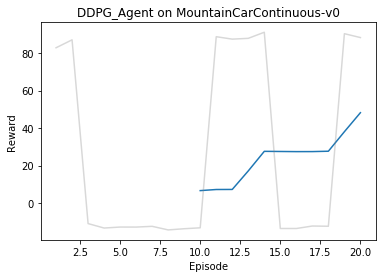

In [12]:
# Plot the rewards.
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

eps, rews = np.array(rewards_list).T
smoothed_rews = running_mean(rews, 10)
plt.plot(eps[-len(smoothed_rews):], smoothed_rews)
plt.plot(eps, rews, color='grey', alpha=0.3)
plt.title('DDPG_Agent on MountainCarContinuous-v0')
plt.xlabel('Episode')
plt.ylabel('Reward')

Conclusion...

## Sample Task

I next observed how well my DDPG agent was able to learn the sample task outlined in the `Sample_Task` class in the file `sample_task.py`. In this task the agent needs to move the quadcopter to a height of 10 meters above the ground, hovering over the center of the map -- at the x-y-z coordinates of (0,0,10), and then maintain the copter at this position.

I first observed the reward earned by running the sample `PolicySearch_Agent` (included inside `agents/policy_search.py`) on this sample task: 

In [21]:
num_episodes = 300
target_pos = np.array([0., 0., 10.])
task = Sample_Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 
rewards_list = []                             # store the total rewards earned for each episode

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    total_reward = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        total_reward += reward
        agent.step(reward, done)
        state = next_state
        if done:
            rewards_list.append((i_episode, total_reward))
            print("\rEpisode = {:4d}, Reward = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, total_reward, agent.best_reward, agent.noise_scale), end="")  # [debug]
            sys.stdout.flush()
            break

Episode =  300, Reward = -15.253 (best =  -5.373), noise_scale = 3.2255

## Plot the Rewards from running sample agent `PolicySearch_Agent` on the Sample Task:

Text(0,0.5,'Reward')

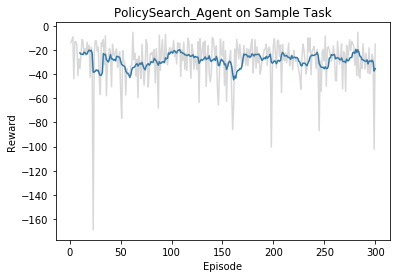

In [22]:
# Plot the rewards.
eps, rews = np.array(rewards_list).T
smoothed_rews = running_mean(rews, 10)
plt.plot(eps[-len(smoothed_rews):], smoothed_rews)
plt.plot(eps, rews, color='grey', alpha=0.3)
plt.title('PolicySearch_Agent on Sample Task')
plt.xlabel('Episode')
plt.ylabel('Reward')

I next observed the reward earned by running the my `DDPG_Agent` (included inside `agents/agent.py`) on this sample task: 

In [20]:
num_episodes = 300
target_pos = np.array([0., 0., 10.])
task = Sample_Task(target_pos=target_pos)
agent = DDPG_Agent(task) 
rewards_list = []                             # store the total rewards earned for each episode
best_reward = -np.inf                         # keep track of the best reward across episodes

max_explore_eps = 100
episode = 0
episode_steps = 0
noise = NewOUNoise()
state = agent.reset_episode() # start a new episode
# Run the simulation for each episode.
for i_episode in range(1, num_episodes+1):
    #state = agent.reset_episode() # start a new episode
    total_reward = 0
    while True:
        action = agent.act(state) 
        if episode < max_explore_eps: # exploration policy
            p = episode/max_explore_eps
            action = action*p + (1-p)*(action + next(noise))
        next_state, reward, done = task.step(action)
        total_reward += reward
        agent.step(action, reward, next_state, done)
        #state = next_state
        episode_steps += 1
        if done:
            rewards_list.append((i_episode, total_reward))
            if total_reward > best_reward:
                best_reward = total_reward  
            print("\rEpisode = {:4d}, Reward = {:7.3f} (best = {:7.3f}), steps {}  ".format(
                i_episode, total_reward, best_reward, episode_steps), end="")  # [debug]
            sys.stdout.flush()
            state = agent.reset_episode() # start a new episode
            episode += 1
            episode_steps = 0
            break
        else:
            state = next_state

Episode =  293, Reward = -103.305 (best =  -0.618), steps 24   

/Users/jamesdellinger/Dropbox/Files/Udacity Classes/Machine Learning Engineer Nanodegree/machine_learning_nanodegree_Quadcopter_RL_project/physics_sim.py:114: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Episode =  300, Reward = -51.870 (best =  -0.618), steps 28  

## Plot the Rewards from running my `DDPG_Agent` on the Sample Task:

Text(0,0.5,'Reward')

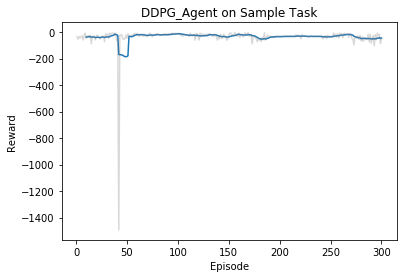

In [21]:
# Plot the rewards.
eps, rews = np.array(rewards_list).T
smoothed_rews = running_mean(rews, 10)
plt.plot(eps[-len(smoothed_rews):], smoothed_rews)
plt.plot(eps, rews, color='grey', alpha=0.3)
plt.title('DDPG_Agent on Sample Task')
plt.xlabel('Episode')
plt.ylabel('Reward')

## My Custom Task

Satisfied by my DDPG agent's superior performance on the Sample Task, as well as by its relatively decent performance on the OpenAI Gym `MountainCarContinuous-v0` task, I then ran and observed my agent's performance on the custom task I created. 

This task is defined in the `Custom_Quadcopter_Task` class inside the `task.py` file. In this task the copter must...

In [ ]:
from task import Custom_Quadcopter_Task

## TODO: Train your agent here.
# Quadcopter's starting position.
runtime = 5.                                     # time limit of the episode
# init_pose = np.array([0.0, 0.0, 10.0, 0.0, 0.0, 0.0])   # initial pose
# init_velocities = np.array([0.0, 0.0, 0.0])         # initial velocities
# init_angle_velocities = np.array([0.0, 0.0, 0.0])   # initial angle velocities
file_output = 'ddpg_agent_custom_quadcopter_task_data.txt'       # file name for saved results

# # Setup
# task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
# agent = Basic_Agent(task)
# done = False
# labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
#           'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
#           'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
# results = {x : [] for x in labels}

# Run the simulation, and save the results.
# with open(file_output, 'w') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(labels)
#     while True:
#         rotor_speeds = agent.act()
#         _, _, done = task.step(rotor_speeds)
#         to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
#         for ii in range(len(labels)):
#             results[labels[ii]].append(to_write[ii])
#         writer.writerow(to_write)
#         if done:
#             break

num_episodes = 1000
task = Custom_Quadcopter_Task(runtime=runtime)
agent = DDPG_Agent(task) 


#Save the simulation's results to a CSV file.
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    
# Run the simulation for each episode.
rewards_list = [] # store the total rewards earned for each episode
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    total_reward = 0
    # Run each episode until it is complete.
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        total_reward += reward
        agent.step(action, reward, next_state, done)
        state = next_state
        # Save quadcopter's behavior during each timestep of the simulation to the CSV file.
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            rewards_list.append((i_episode, total_reward))
            print("\rEpisode = {:4d}, Reward = {:7.3f}".format(i_episode, total_reward), end="")  # [debug]
            break
    sys.stdout.flush()

## Plot the Rewards from running my `DDPG_Agent` on my Custom Task:

The graphs above give me a rough indication that over time, my agent seems to guide the quadcopter to behave in a manner consistent with the task's goals. I'm now ready to graph my DDPG agent's earned reward and see if it does improve over time, which would indicate whether or not the agent is indeed making progress in learning how to accomplish the task.

In [2]:
## TODO: Plot the rewards.
eps, rews = np.array(rewards_list).T
smoothed_rews = running_mean(rews, 10)
plt.plot(eps[-len(smoothed_rews):], smoothed_rews)
plt.plot(eps, rews, color='grey', alpha=0.3)
plt.title('DDPG_Agent on Custom Task')
plt.xlabel('Episode')
plt.ylabel('Reward')

In can get an idea whether my agent was able to learn the task by observing the quadcopter's behavior (its position and speed) across episodes. 

In [ ]:
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: